# Business Understanding/Бизнес-анализ
## Determine Business Objectives/ Определение бизнес-целей

Не возможно установить. Придумаем задачу.
Допустим по закону на вине должна стоять маркировка качества вина от 0 до 10 и мы не хотим тратить ресурсы на дегустацию.  
Бизнес-цель: Дать инструмент, который определит качество вина по физ-хим свойствам.  
Критерий успеха: в течение как минимум двух лет дегустацию можно будет проводить реже или вообще не проводить. За счет этого мы должны сэкономить денег больше, чем потратили на разработку модели. Например, будем проводить дегустацию только тех партий, для которых по физ-хим показателям получаем ненадежные результаты (вероятность принадлежности к классу от 50 до 70 процентов.)

## Assess Situation/ Оценка текущей ситуации
Предположим, пока используется дегустация. Модели нет, но физ-хим данные уже и так собираются.   
Инвентаризация ресурсов - не будем выдумывать.  
Сбор требований - тут может быть формат результата - web-сервис или standalone-приложение на python. Требования формата ограничения может быть: не распространять код, использовать только совободное ПО. Требования к интерфейсу ПО тоже тут. Возможно, потребуется автоматизация ввода данных - API со стороны ПО. Но, скорее всего, API второстепенно и на время эксперимента можно оставить задачу ввода за аналитиками из команды.  
Риски - уже есть такой инструмент и разработка не нужна - нужно искать что-то похожее. Также основные: изменение требований, проблемы с данными, плохие вероятности работы модели.  
Анализ выгод и затрат - нужно считать затраты на дегустацию/без нее, затраты на проект.  



## Determine Data Mining Goals/ Определение целей аналитики
Цель DS: Обучить, задеплоить и контролировать качество модели, которая будет определять качество вина. 

## ProduktProject Plan/ Подготовка плана проекта

|фаза|время|ресурсы|риски|комментарий|
|--|--|--|--|--|
|Business Understanding|2 недели|Аналитики|Изменение требований|долго - много интервью|
|Data Understanding|2 недели|Аналитики|Проблемы с данными, технологиями|могут не подходить стандартные модели, напимер, из-за малых данных|
|Data Preparation|2 недели|DS, DE|Проблемы с технологиями, данными|М.б. не выйдет создать хороших признаков с большой корреляцией|
|Modeling|2 недели| DS |Проблемы с технологией|Нет подходящих моделей - все с низкой вероятностью класса|
|Evaluation|1 неделя|Аналитики|Изменение требований, отсутствие хороших предсказаний|На реальных данных, например, сильно изменились физ-хим показатели и класс предсказывается плохо.|
|Deployment|2 недели|Разработчик, DS|Изменение требований, отсутствие результата|Заказчик, например, забыл, что какой-то показатель он не может измерить. Интерфейс не удобный.|

# DataUnderstanding/ Анализ данных

## Collect Initial Data/ Сбор данных 
Скачали данные с kaggle.


## Describe Data/ Описание данных 
Посмотрели описание на kaggle + ниже.

In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('winequalityN.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
df['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

Действительно тут физ-хим показатели + тип (красное/белое)

Связанные данные: 
* кислотность (два вида) скорее всего важны именно в паре. Вероятоно, хорошо использовать их линейную комбинацию (например, сумму)
* также с кислотностью точно будет связан pH
* свободный и общий диоксид серы - тоже связаны скорее всего. Также можно использовать сумму в качестве признака


## Explore Data/ Изучение данных

Корреляции переменных см. ниже


<AxesSubplot:>

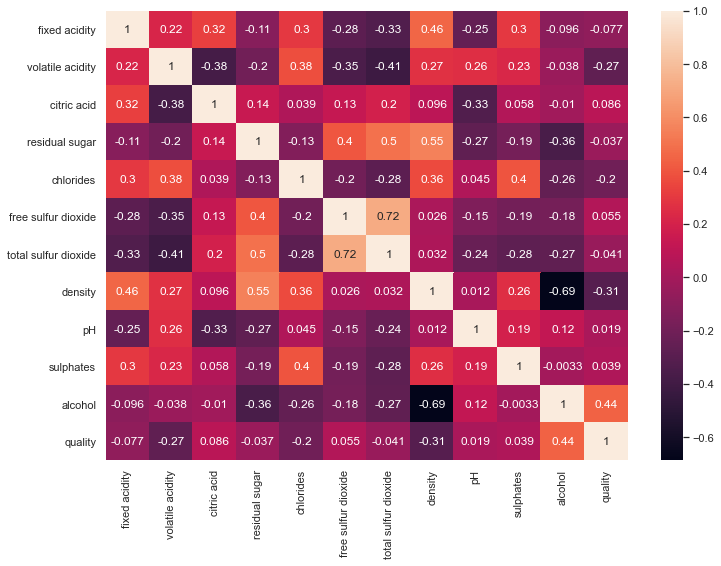

In [6]:
import seaborn as sns

Var_Corr = df.corr()
# plot the heatmap and annotation on it
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

Больше всего коррелируют: алкоголь, переменная кислотность, хлориды, плотность

## Verify Data Quality/ Проверка качества данных

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Есть пропуски в данных.
Нужно проверить на выбросы.